In [1]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.stats import norm, skewnorm

In [2]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import style, hdi, find_max, load_spectral_types

In [5]:
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [6]:
style(name="seaborn-notebook")

In [7]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [8]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [9]:
eff_vol = glob(join(root_data_dir, 'Effective-Volume', "z*"))
eff_vol.sort()
eff_vol

['/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.36)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.37)_(0.39).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Vo

In [10]:
import re
c1, c2 = [], []
# get the value between () of the file name
for f in eff_vol:
    c1.append(float(re.findall(r'\((.*?)\)', f)[0]))
    c2.append(float(re.findall(r'\((.*?)\)', f)[1]))
c1 = np.array(c1)
c2 = np.array(c2)
c = 0.5*(c1+c2)
c

array([0.   , 0.13 , 0.18 , 0.215, 0.245, 0.27 , 0.29 , 0.31 , 0.33 ,
       0.35 , 0.365, 0.38 , 0.395])

In [11]:
mcmc_dm_dir = join(root_data_dir, "MCMC", "dddm", "data")
mcmc_dm_dir

'/home2/s20321005/Thesis-Project/Data/MCMC/dddm/data'

In [12]:
dm_2_files = glob(join(mcmc_dm_dir, "chain-2-*"))
dm_2_files.sort()
dm_2_files

['/home2/s20321005/Thesis-Project/Data/MCMC/dddm/data/chain-2-0.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dddm/data/chain-2-1.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dddm/data/chain-2-10.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dddm/data/chain-2-11.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dddm/data/chain-2-12.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dddm/data/chain-2-2.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dddm/data/chain-2-3.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dddm/data/chain-2-4.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dddm/data/chain-2-5.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dddm/data/chain-2-6.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dddm/data/chain-2-7.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dddm/data/chain-2-8.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dddm/data/chain-2-9.npy']

## tes

In [13]:
index = 2
df = np.load(join(mcmc_dm_dir, f"chain-2-{index}.npy"))
df.shape

(20000, 72, 35)

In [45]:
rhob = df[:, :, :12]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
rhoDM = df[:, :, 24].reshape(-1)/1E-2
sigmaDD = df[:, :, 25].reshape(-1)
log_hDD = df[:, :, 26].reshape(-1)
rhoD = rhoDM + sigmaDD/(4*np.exp(log_hDD))/1E-2
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2

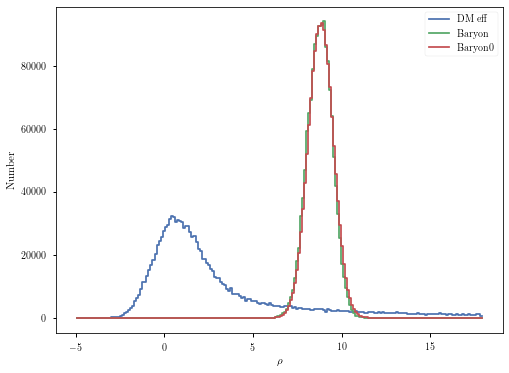

In [156]:
rho = np.linspace(-5, 18, 200)
rhoD_num, _ = np.histogram(rhoD, bins=rho)
rhob_num, _ = np.histogram(rhob, bins=rho)
rhob0_num, _ = np.histogram(rhob0, bins=rho)
rhomid = 0.5*(rho[1:] + rho[:-1])
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoD_num, label='DM eff')
ax.step(rhomid, rhob_num, label='Baryon')
ax.step(rhomid, rhob0_num, label='Baryon0')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

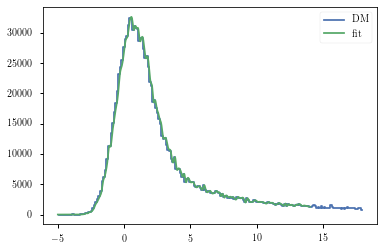

In [157]:
from scipy.interpolate import splrep, BSpline

rhoD_fit = splrep(rhomid, rhoD_num, s=100)
rhox = np.linspace(-5, 14, 1000)
plt.step(rhomid, rhoD_num, label='DM')
plt.plot(rhox, BSpline(*rhoD_fit)(rhox), label='fit')
plt.legend()
plt.show()

In [139]:
from scipy.integrate import simps

rhob_sample = np.random.choice(rhob, size=2000, replace=False)
rhob_fit = skewnorm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=2000, replace=False)
rhob0_fit = norm.fit(rhob0_sample)

rhoD_fit = splrep(rhomid, rhoD_num, s=50)
integrate = np.linspace(-5, 14, 1000)
area = simps(BSpline(*rhoD_fit)(integrate), integrate)

def get_rhoD(x, area, rhoD_fit):
    return BSpline(*rhoD_fit)(x)/area
area

117316.64060902572

((-0.83474686657696, 9.240209072714576, 0.8328844670059901),
 (8.886761348171003, 0.6952003073756221))

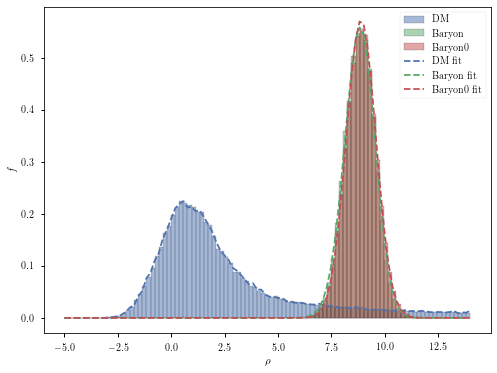

In [140]:
# plot
rho = np.linspace(-5, 14, 100)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, get_rhoD(rho), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
rhob_fit, rhob0_fit

rhoDM = 0.21 +2.99/-1.17
rhob = 8.85 +0.70/-0.72
rhob0 = 8.89 +0.70/-0.69


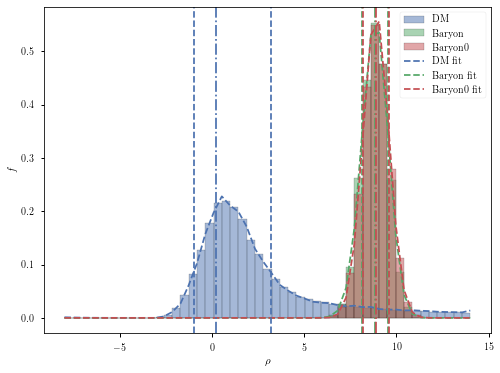

In [142]:
rhoD_low, rhoD_high = hdi(lambda x: get_rhoD(x), perc=0.68, res=1E3, min=-5, max=14)
rhoD_mode = find_max(lambda x: get_rhoD(x), x0=0.0)[0]

rhob_low, rhob_high = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), perc=0.68, res=1E3, min=-5, max=14)
rhob_mode = find_max(lambda x: skewnorm.pdf(x, *rhob_fit), x0=0.0)[0]

rhob0_low, rhob0_high = hdi(lambda x: norm.pdf(x, *rhob0_fit), perc=0.68, res=1E3, min=-5, max=14)
rhob0_mode = find_max(lambda x: norm.pdf(x, *rhob0_fit), x0=0.0)[0]

# plot
rho = np.linspace(-8, 14, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, get_rhoD(rho), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhoD_mode, color='C0', ls='-.')
ax.axvline(rhob_mode, color='C1', ls='-.')
ax.axvline(rhob0_mode, color='C2', ls='-.')
ax.axvline(rhoD_low, color='C0', ls='--')
ax.axvline(rhoD_high, color='C0', ls='--')
ax.axvline(rhob_low, color='C1', ls='--')
ax.axvline(rhob_high, color='C1', ls='--')
ax.axvline(rhob0_low, color='C2', ls='--')
ax.axvline(rhob0_high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhoDM = {rhoD_mode:.02f} +{rhoD_high-rhoD_mode:.02f}/-{rhoD_mode-rhoD_low:.02f}')
print(f'rhob = {rhob_mode:.02f} +{rhob_high-rhob_mode:.02f}/-{rhob_mode-rhob_low:.02f}')
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low:.02f}')

rhob0 = 8.89 +0.71/-0.71


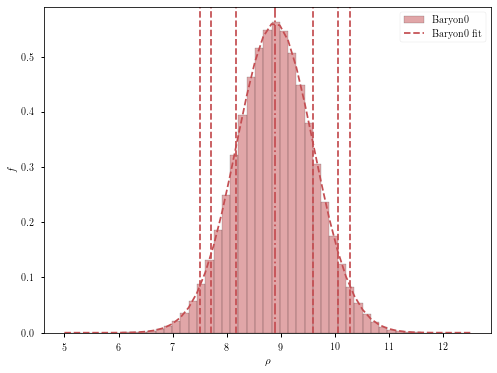

In [143]:
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2
# fit with gaussian
rhob0_fit = norm.fit(rhob0)
# mode
rhob0_mode = find_max(lambda x: norm.pdf(x, *rhob0_fit), x0=0.0)[0]
# find 
sigma_1 = 68/100
sigma_2 = 90/100
sigma_3 = 95/100
rhob0_low = {}
rhob0_high = {}
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    low, high = hdi(lambda x: norm.pdf(x, *rhob0_fit), perc=sigma, res=1E3, min=5, max=13)
    rhob0_low[i] = low
    rhob0_high[i] = high
# plot
rho = np.linspace(5, 12.5, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhob0_mode, color='C2', ls='-.')
for i in range(3):
    ax.axvline(rhob0_low[i], color='C2', ls='--')
    ax.axvline(rhob0_high[i], color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high[0]-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low[0]:.02f}')

  0%|          | 0/13 [00:00<?, ?it/s]

fitting...


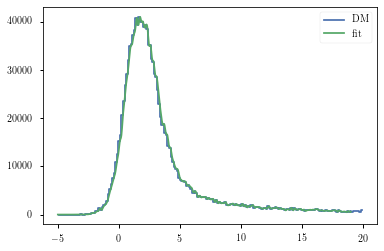

calculating HDI...


/home2/s20321005/Thesis-Project/utils/hdi.py:22: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = integrate.quad(func, a=x_mask[0], b=x_mask[-1])
  8%|▊         | 1/13 [00:37<07:32, 37.75s/it]

calculating mode
fitting...


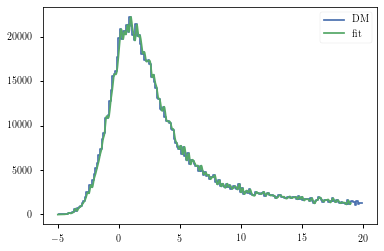

calculating HDI...


 15%|█▌        | 2/13 [01:17<07:07, 38.86s/it]

calculating mode
fitting...


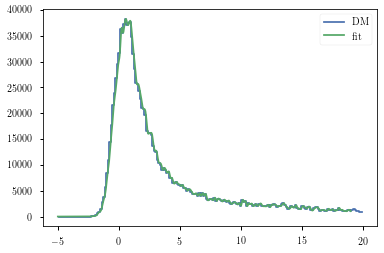

calculating HDI...


 23%|██▎       | 3/13 [01:58<06:40, 40.08s/it]

calculating mode
fitting...


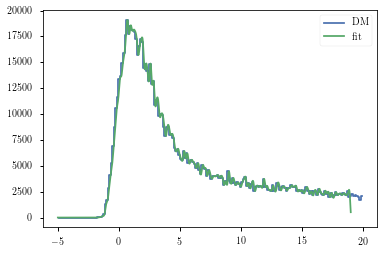

calculating HDI...


 31%|███       | 4/13 [02:32<05:39, 37.68s/it]

calculating mode
fitting...


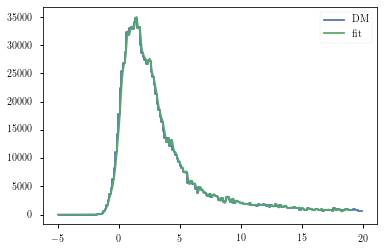

calculating HDI...


 38%|███▊      | 5/13 [03:07<04:51, 36.42s/it]

calculating mode
fitting...


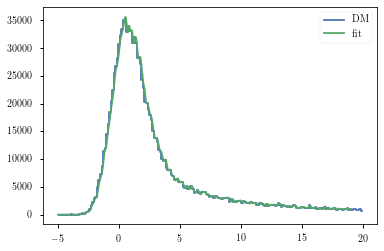

calculating HDI...


 46%|████▌     | 6/13 [03:40<04:07, 35.34s/it]

calculating mode
fitting...


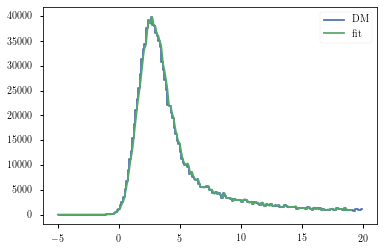

calculating HDI...


 54%|█████▍    | 7/13 [04:04<03:09, 31.64s/it]

calculating mode
fitting...


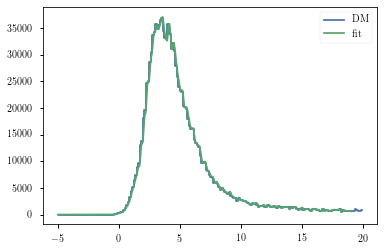

calculating HDI...


 62%|██████▏   | 8/13 [04:21<02:15, 27.14s/it]

calculating mode
fitting...


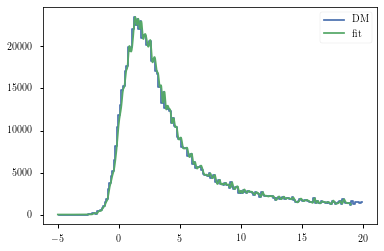

calculating HDI...


 69%|██████▉   | 9/13 [04:44<01:42, 25.62s/it]

calculating mode
fitting...


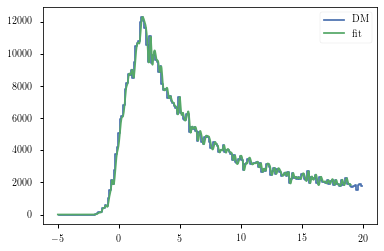

calculating HDI...


 77%|███████▋  | 10/13 [05:16<01:22, 27.63s/it]

calculating mode
fitting...


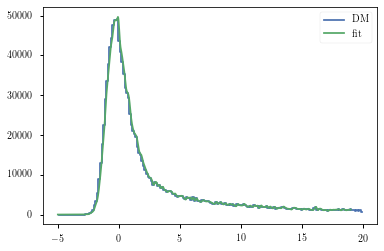

calculating HDI...


 85%|████████▍ | 11/13 [05:44<00:55, 27.74s/it]

calculating mode
fitting...


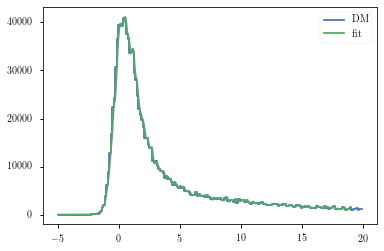

calculating HDI...


 92%|█████████▏| 12/13 [06:20<00:30, 30.37s/it]

calculating mode
fitting...


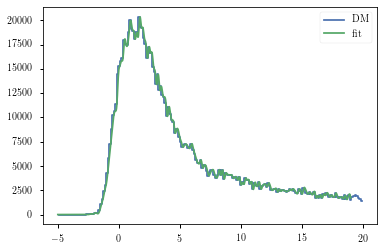

calculating HDI...


100%|██████████| 13/13 [07:00<00:00, 32.32s/it]

calculating mode


In [317]:
from tqdm import tqdm

rhoD_modes = []
rhoD_errs = []
rhob_modes = []
rhob_errs = []
rhoD_fits = []

def get_rhoD(x, area, rhoD_fit):
    return BSpline(*rhoD_fit)(x)/area

rho_edge = np.linspace(-5, 20, 200)
rhomid = 0.5*(rho_edge[1:] + rho_edge[:-1])

for index in tqdm(range(len(dm_2_files))):
    df = np.load(dm_2_files[index])
    rhob = df[:, :, :12]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    rhoDM = df[:, :, 24].reshape(-1)/1E-2
    sigmaDD = df[:, :, 25].reshape(-1)
    log_hDD = df[:, :, 26].reshape(-1)
    rhoD = rhoDM + sigmaDD/(4*np.exp(log_hDD))/1E-2
    print("fitting...")
    rhoD_num, _ = np.histogram(rhoD, bins=rho_edge)
    rhoD_fit = splrep(rhomid, rhoD_num, s=200)
    rhox = np.linspace(-5, 19, 1000)
    area = simps(BSpline(*rhoD_fit)(rhox), rhox)
    plt.step(rhomid, rhoD_num, label='DM')
    plt.plot(rhox, BSpline(*rhoD_fit)(rhox), label='fit')
    plt.legend()
    plt.show()
    rhoD_fits.append({'area': area, 'fit': rhoD_fit})
    rhob_sample = np.random.choice(rhob, size=2000, replace=False)
    rhob_fit = skewnorm.fit(rhob_sample)
    print("calculating HDI...")
    rhoD_low = {}
    rhoD_high = {}
    rhob_low = {}
    rhob_high = {}
    for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
        low, high = hdi(lambda x: get_rhoD(x, area, rhoD_fit), perc=0.68, res=1E3, min=-5, max=14)
        rhoD_low[i] = low
        rhoD_high[i] = high
        low, high = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), perc=sigma, res=1E3, min=5, max=13)
        rhob_low[i] = low
        rhob_high[i] = high
    print("calculating mode")
    rhoD_mode = find_max(lambda x: get_rhoD(x, area, rhoD_fit), x0=0.0)[0]
    rhob_mode = find_max(lambda x: skewnorm.pdf(x, *rhob_fit), x0=0.0)[0]
    rhoD_modes.append(rhoD_mode)
    rhoD_errs.append({'low': rhoD_low, 'high': rhoD_high})
    rhob_modes.append(rhob_mode)
    rhob_errs.append({'low': rhob_low, 'high': rhob_high})
    v = get_rhoD(rhox, area, rhoD_fit)
    if np.sum(v) < 0:
        raise ValueError(f"negative value at {index}")
    

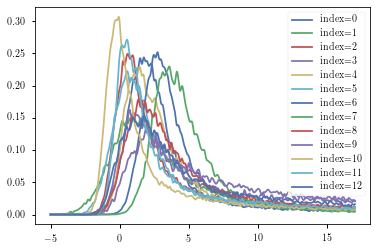

In [320]:
rhox = np.linspace(-5, 17, 1000)
for i, p in enumerate(rhoD_fits):
    plt.plot(rhox, get_rhoD(rhox, p['area'], p['fit']), label="index={}".format(i))
plt.legend()
plt.show()

In [296]:
# df = np.load(dm_2_files[3])
# rhob = df[:, :, :12]
# rhob = rhob.reshape(-1, 12)
# rhob = rhob.sum(axis=1)/1E-2
# rhoDM = df[:, :, 24].reshape(-1)/1E-2
# sigmaDD = df[:, :, 25].reshape(-1)
# log_hDD = df[:, :, 26].reshape(-1)
# rhoD = rhoDM + sigmaDD/(4*np.exp(log_hDD))/1E-2
# print("fitting...")
# rhoD_num, _ = np.histogram(rhoD, bins=rho_edge)
# rhoD_fit = splrep(rhomid, rhoD_num, s=50)
# rhox = np.linspace(-5, 18, 1000)
# area = simps(BSpline(*rhoD_fit)(integrate), integrate)
# plt.step(rhomid, rhoD_num, label='DM')
# plt.plot(rhox, BSpline(*rhoD_fit)(rhox), label='fit')
# plt.legend()
# plt.show()
# # rhoD_fits.append({'area': area, 'fit': rhoD_fit})
# # rhob_sample = np.random.choice(rhob, size=2000, replace=False)
# # rhob_fit = skewnorm.fit(rhob_sample)
# # print("calculating HDI...")
# # rhoD_low = {}
# # rhoD_high = {}
# # rhob_low = {}
# # rhob_high = {}
# # for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
# #     low, high = hdi(lambda x: get_rhoD(x, area, rhoD_fit), perc=0.68, res=1E3, min=-5, max=14)
# #     rhoD_low[i] = low
# #     rhoD_high[i] = high
# #     low, high = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), perc=sigma, res=1E3, min=5, max=13)
# #     rhob_low[i] = low
# #     rhob_high[i] = high
# # print("calculating mode")
# # rhoD_mode = find_max(lambda x: get_rhoD(x, area, rhoD_fit), x0=0.0)[0]
# # rhob_mode = find_max(lambda x: skewnorm.pdf(x, *rhob_fit), x0=0.0)[0]
# # # rhoD_modes.append(rhoD_mode)
# # # rhoD_errs.append({'low': rhoD_low, 'high': rhoD_high})
# # # rhob_modes.append(rhob_mode)
# # # rhob_errs.append({'low': rhob_low, 'high': rhob_high})

<ipython-input-279-c225b102fb4a>:12: RuntimeWarning: invalid value encountered in power
  return a/(b*x-c)**d


array([8.12723096e+04, 7.81747765e+00, 1.93283471e+01, 5.59462985e-01])

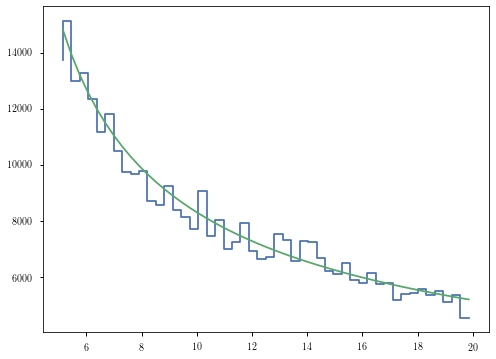

In [279]:
mask = rhoD > 2
rhoD_mask = rhoD[mask]



# plot
rho = np.linspace(5, 20, 50)
rhomid = 0.5*(rho[1:] + rho[:-1])
rhoD_num_mask, _ = np.histogram(rhoD_mask, bins=rho)

def tes(x, a, b, c, d):
    return a/(b*x-c)**d

from scipy.optimize import curve_fit

p0 = [400000, 5, 1, 1]
popt, pcov = curve_fit(tes, rhomid, rhoD_num_mask, p0=p0)
# popt = p0

fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoD_num_mask, label='DM')
ax.plot(rhomid, tes(rhomid, *popt), label='fit')
popt

(-2.0, 5.0)

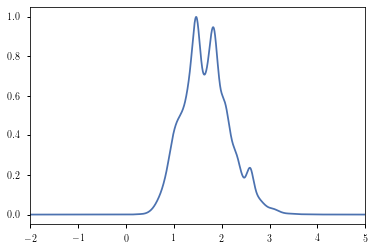

In [321]:
# multiplying the rhoDM, but it became addition in log
rho = np.linspace(-5, 15, 10000)
log_rhoD = None
for p in rhoD_fits:
    if log_rhoD is None:
        log_rhoD = np.log(np.abs(get_rhoD(rho, p['area'], p['fit'])))
    else:
        log_rhoD += np.log(np.abs(get_rhoD(rho, p['area'], p['fit'])))
# turn into rhoDM
rhoD_com = np.exp(log_rhoD)
# find max value
rho_max = np.max(rhoD_com)
# normalize
rhoD_com /= rho_max
# plot
fig, ax = plt.subplots()
ax.plot(rho, rhoD_com, label='rhoDM')
ax.set_xlim(-2,5)

In [322]:
from scipy.optimize import curve_fit

def skewpdf(x, a, loc, scale, alpha):
    return a * skewnorm.pdf(x, loc=loc, scale=scale, a=alpha)

rhoD_com_fit_un, _ = curve_fit(skewpdf, rho, rhoD_com, p0=[2, 1, 1.0, 2.0])
rhoD_com_fit_un

array([1.07170746, 1.24324181, 0.65052692, 1.40094699])

(-2.0, 5.0)

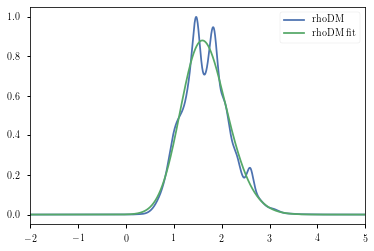

In [331]:
plt.plot(rho, rhoD_com, label='rhoDM')
plt.plot(rho, skewpdf(rho, *rhoD_com_fit_un), label='rhoDM fit')
plt.legend()
plt.xlim(-2,5)

In [334]:
rhoD_com_fit = rhoD_com_fit_un[1:]
rhoD_com_low = {}
rhoD_com_high = {}
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    low, high = hdi(lambda x: skewnorm.pdf(x, *rhoD_com_fit), perc=sigma, res=1E3, min=-1, max=5)
    rhoD_com_low[i] = low
    rhoD_com_high[i] = high
rhoD_com_mode = find_max(lambda x: skewnorm.pdf(x, *rhoD_com_fit), x0=0.0)[0]
rhoD_com_mode

1.3977500000000014

In [335]:
rhoD_com_low, rhoD_com_high

({0: 0.3573573573573574, 1: -0.2852852852852853, 2: -0.5915915915915916},
 {0: 2.5195195195195197, 1: 3.3123123123123124, 2: 3.7087087087087083})

In [324]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

In [327]:
c

array([0.   , 0.13 , 0.18 , 0.215, 0.245, 0.27 , 0.29 , 0.31 , 0.33 ,
       0.35 , 0.365, 0.38 , 0.395])

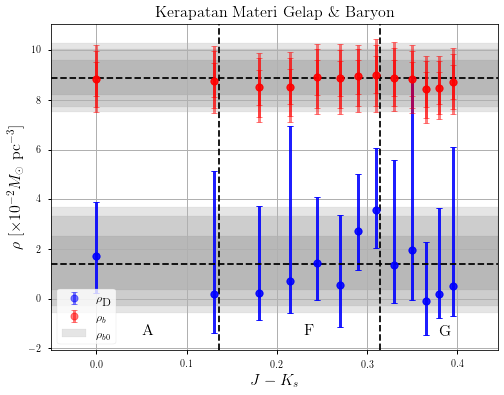

1.3977500000000014

In [339]:
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=rhob0_mode, color='black', linestyle='--')
for i in range(3):
    low = np.array([err['low'][i] for err in rhoD_errs])
    high = np.array([err['high'][i] for err in rhoD_errs])
    dm_ax = ax.errorbar(c, rhoD_modes, yerr=[rhoD_modes-low, high-rhoD_modes], fmt='o', color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([err['low'][i] for err in rhob_errs])
    high = np.array([err['high'][i] for err in rhob_errs])
    rhob_ax = ax.errorbar(c, rhob_modes, yerr=[rhob_modes-low, high-rhob_modes], fmt='o', color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    rhob0_ax = ax.fill_between(cs, rhob0_low[i], rhob0_high[i], color='black', alpha=0.1)
    ax.fill_between(cs, rhoD_com_low[i], rhoD_com_high[i], color='black', alpha=0.1)
    if i == 2:
        ax.legend([dm_ax, rhob_ax, rhob0_ax], 
                  [r'$\rho_{\textup{D}}$', r'$\rho_{b}$', r'$\rho_{b0}$'],
                  loc='lower left', fontsize=12)
# real value
ax.axhline(y=rhoD_com_mode, color='black', linestyle='--')
ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.text(0.05, -1.5, r'$\textup{A}$', fontsize=16)
ax.text(0.23, -1.5, r'$\textup{F}$', fontsize=16)
ax.text(0.38, -1.5, r'$\textup{G}$', fontsize=16)
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$\rho$ [$\times 10^{-2}M_{\odot}\ $pc$^{-3}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Kerapatan Materi Gelap \& Baryon", fontsize=16)
ax.grid()
# fig.savefig(join('img', 'rhoDM.pdf'), dpi=300)
plt.show()
rhoD_com_mode